In [1]:
import pandas as pd
import pandas.io.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.notebook_repr_html = False

pd.options.display.mpl_style = 'default'
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 10

import datetime
import statsmodels.api as stats

In [2]:
start_date = '2015-01-01'
end_date = datetime.date.today()

# Libor Curve

In [3]:
libor_symbols = ["USDONTD156N", "USD1MTD156N", "USD2MTD156N", "USD3MTD156N", "USD6MTD156N"]

In [4]:
libor_rates = web.DataReader(libor_symbols, "fred", start=start_date, end=end_date)

In [5]:
libor_rates = libor_rates.ffill()

/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


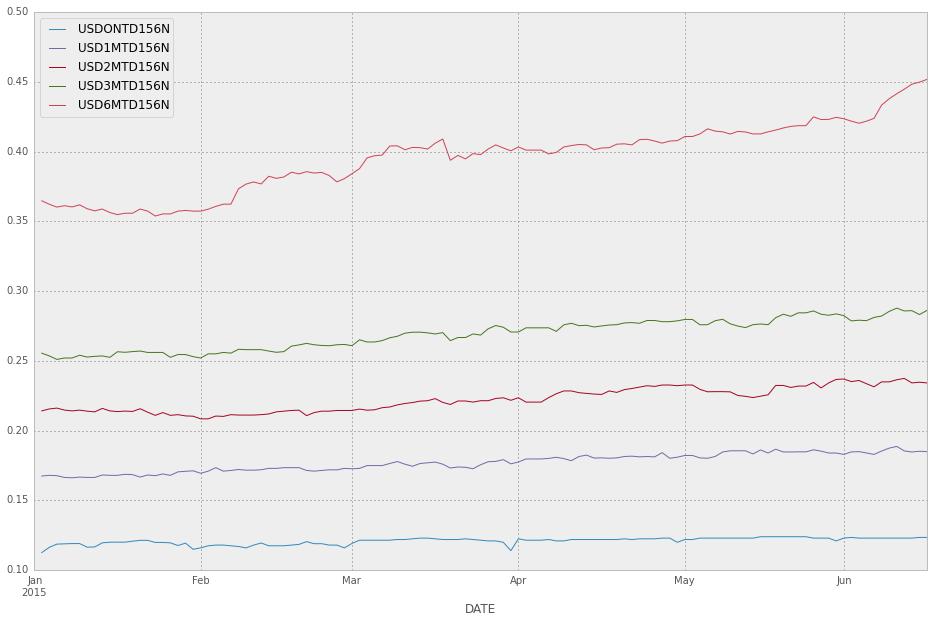

In [6]:
libor_rates.plot()

In [7]:
libor_curve = libor_rates.tail(1)

In [8]:
libor_date = libor_curve.index

In [9]:
libor_curve = libor_curve.transpose()

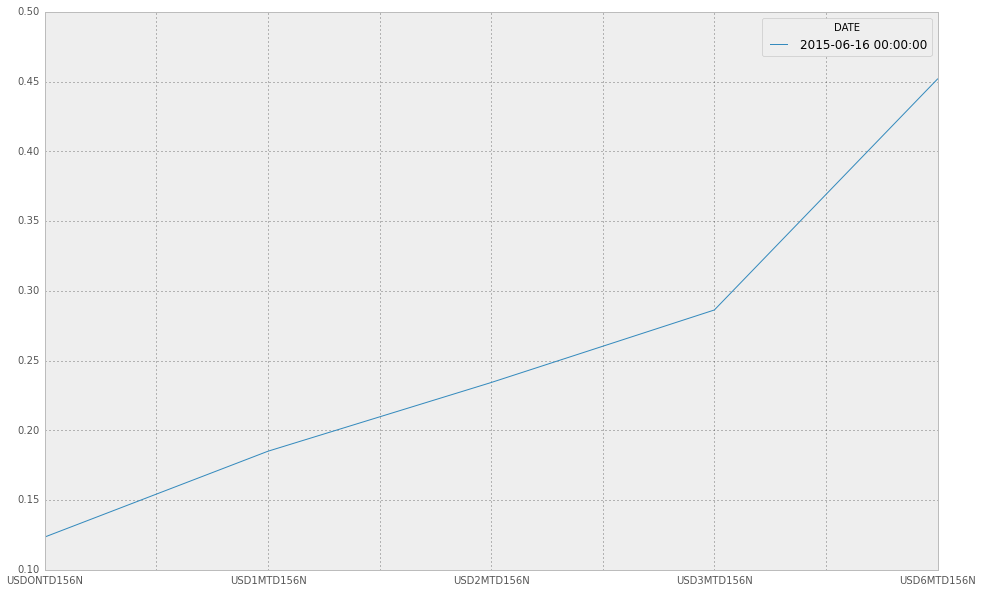

In [10]:
libor_curve.plot()

# Swap Curve

In [11]:
swap_symbols = ["DSWP1","DSWP2","DSWP3","DSWP4","DSWP5","DSWP7","DSWP10", "DSWP30"]

In [12]:
swap_rates = web.DataReader(swap_symbols, 'fred', start=start_date, end=end_date)

In [13]:
swap_rates = swap_rates.ffill()

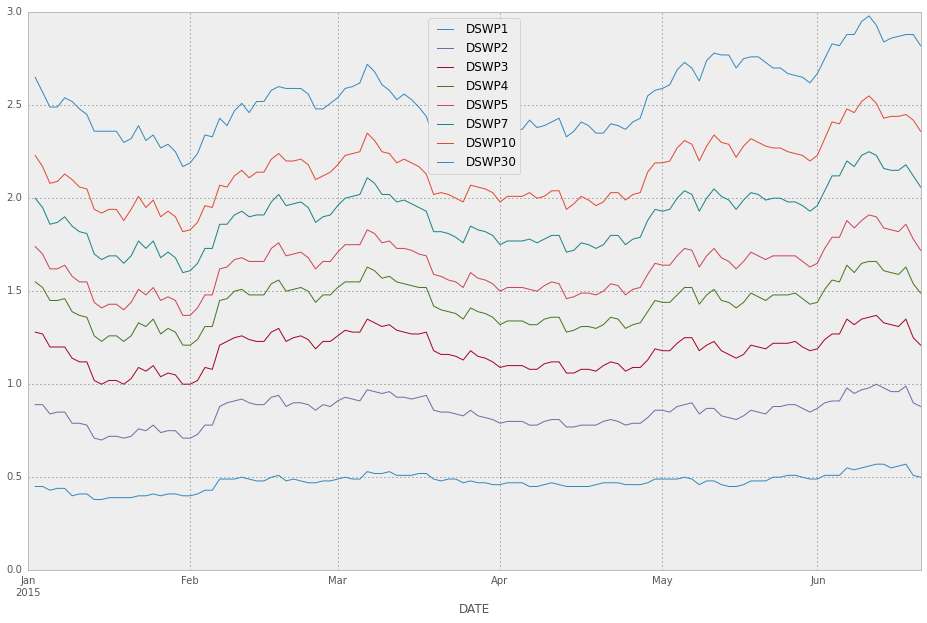

In [14]:
swap_rates.plot(legend='bottom')

In [15]:
all_rates = libor_rates.join(swap_rates)

In [16]:
all_rates = all_rates.dropna()

In [17]:
swap_curve = all_rates.tail(1).transpose()

In [18]:
swap_curve

DATE         2015-06-16
USDONTD156N     0.12350
USD1MTD156N     0.18500
USD2MTD156N     0.23425
USD3MTD156N     0.28625
USD6MTD156N     0.45185
DSWP1           0.56000
DSWP2           0.96000
DSWP3           1.31000
DSWP4           1.59000
DSWP5           1.82000
DSWP7           2.15000
DSWP10          2.44000
DSWP30          2.87000

In [19]:
swap_curve.index = [1/360, 1/12, 2/12, 3/12, 6/12, 1, 2,3,4,5,7,10,30]

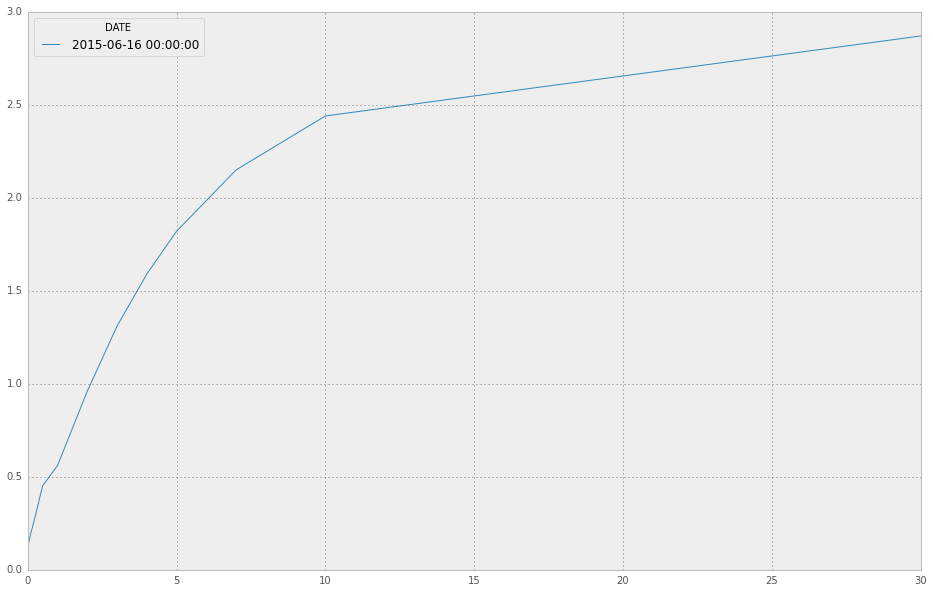

In [20]:
swap_curve.plot()

# Swap Curve

In [39]:
symbols = pd.Series((["USDONTD156N", "USD1MTD156N", "USD2MTD156N",
                      "USD3MTD156N", "USD6MTD156N", "DSWP1","DSWP2",
                      "DSWP3","DSWP4","DSWP5","DSWP7","DSWP10", "DSWP30"]),
                    index=np.array([1/360, 1/12, 2/12, 3/12, 6/12, 1, 2,3,4,5,7,10,30]))

In [40]:
symbols

0.002778     USDONTD156N
0.083333     USD1MTD156N
0.166667     USD2MTD156N
0.250000     USD3MTD156N
0.500000     USD6MTD156N
1.000000           DSWP1
2.000000           DSWP2
3.000000           DSWP3
4.000000           DSWP4
5.000000           DSWP5
7.000000           DSWP7
10.000000         DSWP10
30.000000         DSWP30
dtype: object

In [41]:
rates = web.DataReader(symbols, 'fred', start=start_date, end=end_date)

In [42]:
rates = rates.ffill()

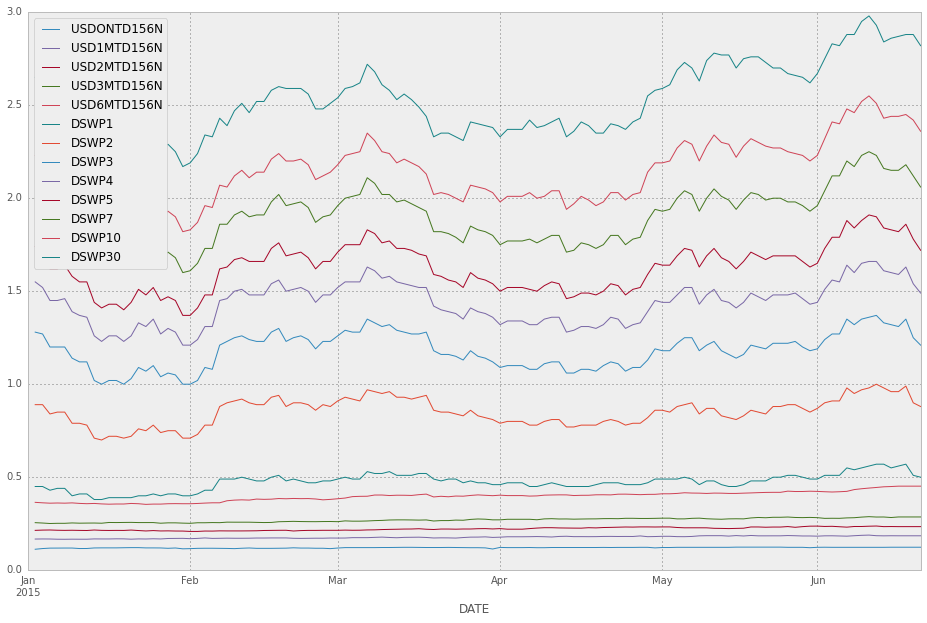

In [43]:
rates.plot()

In [44]:
swap_curve = rates.tail(1).transpose()

In [46]:
swap_curve = symbols.map(swap_curve.ix[:, 0])

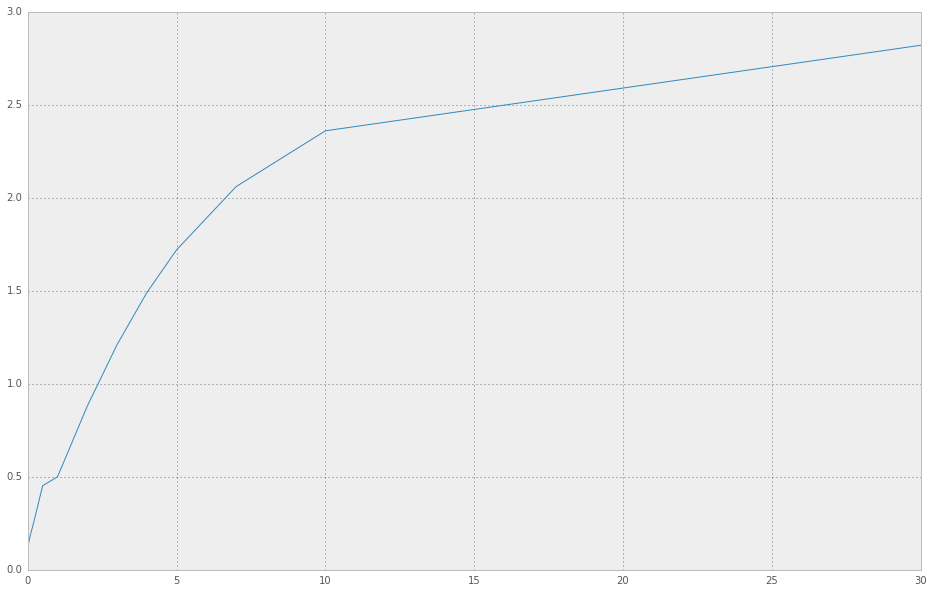

In [47]:
swap_curve.plot()